In [2]:
### Hi, this is a sentiment analysis of the Twitter activity for 5 News Media - BBC, CBS, CNN, Fox and New York times
### We are charting 2 plots - scatter using matplotlib and Bar graph using Seaborn libraries
###  Observation, 
### Ran the script 3 days consecutive just to collect samples and understand the variance in the sentiments of the 5 different media news
### 1. By looking at scatter plot (relation between tweets polarity and tweets ago), the tweet polarity is ranging from neutral (0) to -ve sentiments for most of the nytimes and foxnews. Only BBC,CBS and CNN were ranging between +ve and neutral
#### Continue #1-> conclusion, nytimes and Foxnews focus on somewhat -ve news.
####2. By looking at bar chart, CBS has overall highest positive tweets. 
### 3. Also plotted -ve average sentiments to check on which media is most overall sentiment -ve, mostly Fox and NY times were slightly have slighlt less +ve sentiments comparitive to other 3 media sources. 

In [3]:
## Defining dependencies 
import json
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from datetime import datetime 
import numpy as np
## Using Vader Sentiment to analyse Sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer= SentimentIntensityAnalyzer()

In [4]:
#seaborn settings
sns.set_palette("deep",desat=.6)
sns.set_context(rc={"figure:figsize":(8,4)})

In [5]:
## Twitter authentication details
consumer_key = "akczLSsb7D39rCQITi6HKKTbS"
consumer_secret = "ZzlplKxUh1agPMHRjouqC1E3T6gdssATmU2e1kiFupNodEwmrH"
access_token = "41056206-bpASiEYIYW7gti7fvZjm1ckaQfskqwMfUIDyfcGRQ"
access_token_secret = "AYjW9Maj2nOELJ7LLEj6YrfXmVqjYWN0lBpX4ariTXED2"
filename = 'apikey'
def get_file_contents(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            for row in f:
                consumer_key = row[0]
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

#api_key = get_file_contents(filename)
#print("Our API key is: %s" % (api_key))


In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
target_user = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")

In [27]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
user_list = []
tweet_times = []
tweet_count = []
tweet_text = []
tweet_compound_mean = []
tweet_negative_mean = []

In [28]:
## Function to capture compound mean that we can use in Seaborn plotting
def tweet_mean_call():
       return tweet_compound_mean.append(np.mean(compound_list))
def tweet_mean_neg_call():
        return tweet_negative_mean.append(np.mean(negative_list))

for user in target_user:
   
    counter=1
    
    for x in range(5):
        public_tweets = api.user_timeline(user,page=20)
        for tweet in public_tweets:
            #print("Tweet from %s #%s:%s" %(user,counter,tweet["text"]))
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweet_datetime = datetime.strptime(tweet["created_at"],"%a %b %d %H:%M:%S %z %Y")
            print("Tweet from %s #%s created on %s:%s" %(user,tweet_datetime,counter,tweet["text"]))
        
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            user_list.append(user)
            tweet_times.append(tweet_datetime)
            tweet_count.append(counter)
            tweet_text.append(tweet["text"])
            counter = counter +1

    #print("Total number of tweets %s" %str(counter -1))
    print(" ---------------TWEET COMPLETED FOR %s-------------" %user)
    
    # Calculating 
    tweet_mean_call()
    tweet_mean_neg_call()
    
            

Tweet from @BBC #2017-12-29 13:41:30+00:00 created on 1:RT @BBCCiN: Best Day Ever? You weren't kidding!

Special thanks to @NiallOfficial​ for topping off a wonderful day for some of the young ca…
Tweet from @BBC #2017-12-29 13:32:04+00:00 created on 2:Ever wondered what makes a wet dog smell? 🤔🐶 10 mysteries you’d like to get to the bottom of https://t.co/MthZREY7Ui https://t.co/o0LwuuXTlk
Tweet from @BBC #2017-12-29 13:00:06+00:00 created on 3:How do we control our body temperature? ❄️🌡

Dr Chris and Dr Xand investigate... https://t.co/kXW1DnCDax https://t.co/F1cyigzOfG
Tweet from @BBC #2017-12-29 12:32:03+00:00 created on 4:From Trump's presidency to the FIFA corruption scandal, The Simpsons has a habit of predicting the future. 

What p… https://t.co/VN0aP5WzSQ
Tweet from @BBC #2017-12-29 12:25:38+00:00 created on 5:RT @bbc5live: "One of the worst films I can remember seeing for many a year... I hope to never have to mention it or think about it ever ag…
Tweet from @BBC #2017-12-29

Tweet from @BBC #2017-12-29 13:41:30+00:00 created on 61:RT @BBCCiN: Best Day Ever? You weren't kidding!

Special thanks to @NiallOfficial​ for topping off a wonderful day for some of the young ca…
Tweet from @BBC #2017-12-29 13:32:04+00:00 created on 62:Ever wondered what makes a wet dog smell? 🤔🐶 10 mysteries you’d like to get to the bottom of https://t.co/MthZREY7Ui https://t.co/o0LwuuXTlk
Tweet from @BBC #2017-12-29 13:00:06+00:00 created on 63:How do we control our body temperature? ❄️🌡

Dr Chris and Dr Xand investigate... https://t.co/kXW1DnCDax https://t.co/F1cyigzOfG
Tweet from @BBC #2017-12-29 12:32:03+00:00 created on 64:From Trump's presidency to the FIFA corruption scandal, The Simpsons has a habit of predicting the future. 

What p… https://t.co/VN0aP5WzSQ
Tweet from @BBC #2017-12-29 12:25:38+00:00 created on 65:RT @bbc5live: "One of the worst films I can remember seeing for many a year... I hope to never have to mention it or think about it ever ag…
Tweet from @BBC #2017-

Tweet from @CBS #2017-10-19 20:57:53+00:00 created on 21:RT @ScorpionCBS: No one should be bullied or called names simply for being who they are. Today, #TeamScorpion is going purple in honor of #…
Tweet from @CBS #2017-10-19 19:50:57+00:00 created on 22:Get ready to go on an unexpected, magical adventure in the animated special Michael Jackson's Halloween on Friday,… https://t.co/CQxmLmDvTy
Tweet from @CBS #2017-10-19 18:59:01+00:00 created on 23:An advantage changed the course of last night's tribal council. Watch the latest episode of #Survivor now:… https://t.co/zNBz4t39i6
Tweet from @CBS #2017-10-19 18:26:42+00:00 created on 24:RT @swatcbs: #SWAT is proud to wear purple &amp; stand together against bullying on #SpiritDay! https://t.co/ch5h6DHLLE
Tweet from @CBS #2017-10-19 18:20:01+00:00 created on 25:RT @LifeInPiecesCBS: Laughter is coming your way! #LifeInPieces returns in TWO WEEKS! https://t.co/kvHTQA3Vlk
Tweet from @CBS #2017-10-19 18:19:51+00:00 created on 26:RT @MomCBS: Do 

Tweet from @CBS #2017-10-19 20:57:53+00:00 created on 81:RT @ScorpionCBS: No one should be bullied or called names simply for being who they are. Today, #TeamScorpion is going purple in honor of #…
Tweet from @CBS #2017-10-19 19:50:57+00:00 created on 82:Get ready to go on an unexpected, magical adventure in the animated special Michael Jackson's Halloween on Friday,… https://t.co/CQxmLmDvTy
Tweet from @CBS #2017-10-19 18:59:01+00:00 created on 83:An advantage changed the course of last night's tribal council. Watch the latest episode of #Survivor now:… https://t.co/zNBz4t39i6
Tweet from @CBS #2017-10-19 18:26:42+00:00 created on 84:RT @swatcbs: #SWAT is proud to wear purple &amp; stand together against bullying on #SpiritDay! https://t.co/ch5h6DHLLE
Tweet from @CBS #2017-10-19 18:20:01+00:00 created on 85:RT @LifeInPiecesCBS: Laughter is coming your way! #LifeInPieces returns in TWO WEEKS! https://t.co/kvHTQA3Vlk
Tweet from @CBS #2017-10-19 18:19:51+00:00 created on 86:RT @MomCBS: Do 

Tweet from @CNN #2018-01-05 22:20:08+00:00 created on 41:Vermont moves to legalize pot as feds signal possible crackdown https://t.co/SNx8qXKWzQ https://t.co/vrTvPbaMxN
Tweet from @CNN #2018-01-05 22:10:03+00:00 created on 42:Secretary of State Rex Tillerson says he's never questioned President Trump's mental fitness https://t.co/w4qiCnrCek https://t.co/sBCygN5Hqh
Tweet from @CNN #2018-01-05 22:00:05+00:00 created on 43:She was roasting marshmallows on New Year's Eve. Then a gas can exploded. https://t.co/dIPVpSksRO https://t.co/iXmHTB1bqz
Tweet from @CNN #2018-01-05 21:50:08+00:00 created on 44:Rep. Elijah Cummings was admitted to the hospital for a bacterial infection in his knee, his office has announced… https://t.co/RGKgL39aen
Tweet from @CNN #2018-01-05 21:40:47+00:00 created on 45:"Jeopardy!" host Alex Trebek is taking a medical leave after he experienced complications from a head injury known… https://t.co/KOhQ3vMuqI
Tweet from @CNN #2018-01-05 21:30:13+00:00 created on 46:Delt

Tweet from @FoxNews #2018-01-07 15:10:47+00:00 created on 1:.@TGowdySC: "We need to talk to everyone who was involved in the drafting of this exoneration memo in May of 2016."… https://t.co/v3RdAN4NXJ
Tweet from @FoxNews #2018-01-07 15:08:30+00:00 created on 2:.@TGowdySC: "This time last year, Democrats wanted James Comey prosecuted. Remember that? Harry Reid wanted him pro… https://t.co/TiTRlyxmLP
Tweet from @FoxNews #2018-01-07 15:07:41+00:00 created on 3:.@TGowdySC: "I have been frankly stunned at how little curiosity my Democrat colleagues and how little curiosity so… https://t.co/NmyUMo89bI
Tweet from @FoxNews #2018-01-07 15:07:01+00:00 created on 4:TONIGHT: @WilliamJBennett hosts "The Wise Guys," a powerful discussion on America's future - Tune in at 8p &amp; 11p ET… https://t.co/uaKJkz5o5P
Tweet from @FoxNews #2018-01-07 15:04:40+00:00 created on 5:.@TGowdySC: "It's not illegitimate for Congress to ask the FBI and the DOJ, 'What did you do? Why did you do it?'"… https://t.co/IpT

Tweet from @FoxNews #2018-01-07 15:10:47+00:00 created on 61:.@TGowdySC: "We need to talk to everyone who was involved in the drafting of this exoneration memo in May of 2016."… https://t.co/v3RdAN4NXJ
Tweet from @FoxNews #2018-01-07 15:08:30+00:00 created on 62:.@TGowdySC: "This time last year, Democrats wanted James Comey prosecuted. Remember that? Harry Reid wanted him pro… https://t.co/TiTRlyxmLP
Tweet from @FoxNews #2018-01-07 15:07:41+00:00 created on 63:.@TGowdySC: "I have been frankly stunned at how little curiosity my Democrat colleagues and how little curiosity so… https://t.co/NmyUMo89bI
Tweet from @FoxNews #2018-01-07 15:07:01+00:00 created on 64:TONIGHT: @WilliamJBennett hosts "The Wise Guys," a powerful discussion on America's future - Tune in at 8p &amp; 11p ET… https://t.co/uaKJkz5o5P
Tweet from @FoxNews #2018-01-07 15:04:40+00:00 created on 65:.@TGowdySC: "It's not illegitimate for Congress to ask the FBI and the DOJ, 'What did you do? Why did you do it?'"… https://t.c

Tweet from @nytimes #2018-01-05 19:22:03+00:00 created on 21:RT @nytvideo: Omar Salinas is one of nearly 200,000 Salvadorans with Temporary Protected Status. He could lose that status this month. Watc…
Tweet from @nytimes #2018-01-05 19:12:03+00:00 created on 22:RT @ditzkoff: I wrote about @sethmeyers as he prepares to host a @goldenglobes show for the #MeToo moment and celebrate an entertainment in…
Tweet from @nytimes #2018-01-05 19:02:10+00:00 created on 23:Chris Christie says he has warned President Trump that you can do nothing to make investigations any shorter, but "… https://t.co/oN6doS4i9p
Tweet from @nytimes #2018-01-05 18:52:04+00:00 created on 24:How to react if you get caught in black ice https://t.co/nfuWIFMvrG
Tweet from @nytimes #2018-01-05 18:42:03+00:00 created on 25:Britain is thinking of charging a 25 pence tax for paper coffee cups, hoping to persuade consumers to switch to reu… https://t.co/XqEuhVgyQX
Tweet from @nytimes #2018-01-05 18:34:11+00:00 created on 26:RT

Tweet from @nytimes #2018-01-05 19:22:03+00:00 created on 81:RT @nytvideo: Omar Salinas is one of nearly 200,000 Salvadorans with Temporary Protected Status. He could lose that status this month. Watc…
Tweet from @nytimes #2018-01-05 19:12:03+00:00 created on 82:RT @ditzkoff: I wrote about @sethmeyers as he prepares to host a @goldenglobes show for the #MeToo moment and celebrate an entertainment in…
Tweet from @nytimes #2018-01-05 19:02:10+00:00 created on 83:Chris Christie says he has warned President Trump that you can do nothing to make investigations any shorter, but "… https://t.co/oN6doS4i9p
Tweet from @nytimes #2018-01-05 18:52:04+00:00 created on 84:How to react if you get caught in black ice https://t.co/nfuWIFMvrG
Tweet from @nytimes #2018-01-05 18:42:03+00:00 created on 85:Britain is thinking of charging a 25 pence tax for paper coffee cups, hoping to persuade consumers to switch to reu… https://t.co/XqEuhVgyQX
Tweet from @nytimes #2018-01-05 18:34:11+00:00 created on 86:RT

In [29]:
#print compound mean of sentiments for each media news
print(tweet_compound_mean)

[0.033605000000000003, 0.031355000000000001, 0.088146666666666651, 0.088350000000000012, 0.083834000000000006]


In [30]:
#print negative mean of sentiments for each media news
print(tweet_negative_mean)

[0.084949999999999998, 0.089724999999999999, 0.066566666666666663, 0.061137499999999997, 0.058480000000000004]


In [31]:
## Defining a dataframe
sentiment=pd.DataFrame({
            "User":user_list,
            "Tweet_count":tweet_count,
            "Tweet_date":tweet_times,
            "Tweet_text":tweet_text,
           "Compound":compound_list,
           "Positive":positive_list,
           "Neutral":neutral_list,
            "Negative":negative_list})
# Organize Dataframe
sentiment = sentiment[["User","Tweet_count","Tweet_date","Tweet_text","Compound","Positive","Neutral","Negative"]]

In [32]:
sentiment.head()

,User,Tweet_count,Tweet_date,Tweet_text,Compound,Positive,Neutral,Negative
0,@BBC,1,2017-12-29 13:41:30+00:00,RT @BBCCiN: Best Day Ever? You weren't kidding...,0.6407,0.255,0.560,0.185
1,@BBC,2,2017-12-29 13:32:04+00:00,Ever wondered what makes a wet dog smell? 🤔🐶 1...,0.3612,0.116,0.884,0.000
2,@BBC,3,2017-12-29 13:00:06+00:00,How do we control our body temperature? ❄️🌡\n\...,0.0000,0.000,1.000,0.000
3,@BBC,4,2017-12-29 12:32:03+00:00,From Trump's presidency to the FIFA corruption...,-0.4404,0.000,0.861,0.139
4,@BBC,5,2017-12-29 12:25:38+00:00,"RT @bbc5live: ""One of the worst films I can re...",-0.2960,0.094,0.774,0.132


In [33]:
sentiment['User'].unique()

array(['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes'], dtype=object)

In [34]:
# Push the sentiment DataFrame to a new CSV file
sentiment.to_csv("sentiment.csv", encoding="utf-8", index=False, header=True)

In [35]:
### Sorting by time of tweets and assigning to each dataframe
BBC_df=sentiment[sentiment['User']=="@BBC"]
BBC_df=BBC_df.sort_values(by='Tweet_date', ascending = False)
CBS_df=sentiment[sentiment['User']=="@CBS"]
CBS_df=CBS_df.sort_values(by='Tweet_date', ascending = False)
CNN_df=sentiment[sentiment['User']=="@CNN"]
CNN_df=BBC_df.sort_values(by='Tweet_date', ascending = False)
FoxNews_df=sentiment[sentiment['User']=="@FoxNews"]
FoxNews_df=FoxNews_df.sort_values(by='Tweet_date', ascending = False)
nytimes_df=sentiment[sentiment['User']=="@nytimes"]
nytimes_df=nytimes_df.sort_values(by='Tweet_date', ascending = False)

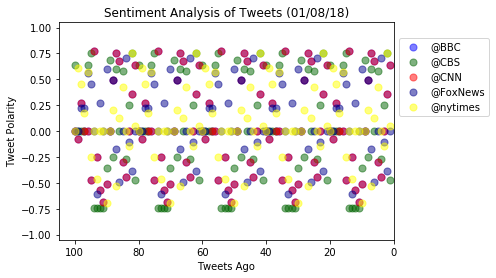

In [36]:
## Incorporate the scatter plot
ax1=BBC_df.plot(kind='scatter',x = "Tweet_count", y = "Compound",c="blue",s=50, alpha=0.5, label='@BBC')
ax2=CBS_df.plot(kind='scatter',x = "Tweet_count", y = "Compound",c="darkgreen", s=50, alpha=0.5, label='@CBS',ax=ax1)
ax3=CNN_df.plot(kind='scatter',x = "Tweet_count", y = "Compound",c="red", s=50, alpha=0.5, label='@CNN',ax=ax2)
ax4=FoxNews_df.plot(kind='scatter',x = "Tweet_count", y = "Compound",c="darkblue", s=50, alpha=0.5, label='@FoxNews',ax=ax3)
ax5=nytimes_df.plot(kind='scatter',x = "Tweet_count", y = "Compound",c="yellow",s=50, alpha=0.5, label='@nytimes',ax=ax4)

plt.title("Sentiment Analysis of Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.ylim([-1.05,1.05])
plt.xlim([105,0])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.75))
plt.savefig("Sentiment_Analysis_of_tweets.png")
plt.show()

In [37]:
#### Seaborn

In [38]:
## Defining overall Sentiment dataframe
overall_sentiment = pd.DataFrame ({"User":target_user,
                                "tweet_compound_mean":tweet_compound_mean,
                                  "tweet_negative_mean":tweet_negative_mean})
overall_sentiment

,User,tweet_compound_mean,tweet_negative_mean
0,@BBC,0.033605,0.084950
1,@CBS,0.031355,0.089725
2,@CNN,0.088147,0.066567
3,@FoxNews,0.088350,0.061137
4,@nytimes,0.083834,0.058480


In [39]:
#colors={"@BBC":'lightblue',"@CBS":'green',"@CNN":'red',"@Fox":'blue',"@nytimes":'yellow'}
colors=["lightblue", "green", "red", "blue", "yellow"]

In [41]:
sns.barplot(x='User',y='tweet_compound_mean',data=overall_sentiment,palette=colors)
# Sets the y limits of Sentiments
plt.ylim(-0.8,0.8)
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment(compound data) based on Twitter (%s)" % time.strftime("%x"),loc = "center")
plt.savefig("Overall_Sentiment_Analysis.png")

In [43]:
plt.show()

In [44]:
sns.barplot(x='User',y='tweet_negative_mean',data=overall_sentiment,palette=colors)
# Sets the y limits of Sentiments
plt.ylim(-0.8,0.8)
plt.ylabel("Tweet Polarity")
plt.title("Overall Media negative Sentiment based on Twitter (%s)" % time.strftime("%x"),loc = "center")
plt.savefig("Overall_negative_Sentiment_Analysis.png")

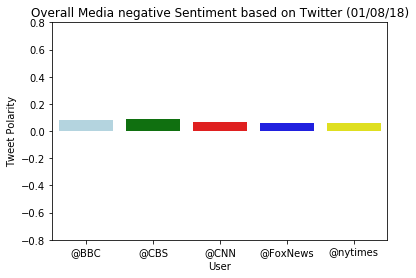

In [45]:
plt.show()